# Machine learning to predict new crescent moon visibility

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# MACHINE LEARNING IMPORTS
#import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [41]:
data_file = '..\\Data\\icouk_sighting_data_with_params.csv'
data = pd.read_csv(data_file)

#data = data.drop('Location', axis = 1)
#data = data.drop('Method', axis = 1)

data = data.drop('Index', axis = 1)
data.head(10)

,Date,Latitude,Longitude,Moon Age,Sunset,Moonset,Lag,Moon Alt,Moon Az,Sun Alt,...,ARCL,ARCV,DAZ,Parallax,W,W',q,q',Cloud Level,Seen
0,2.457309e+06,53.95763,-1.08271,0.722,2.457309e+06,2.457309e+06,27.05935,1.51838,252.00232,-1.73173,...,7.73820,3.25011,7.02353,54.14174,0.13433,0.13438,-0.77507,-0.77503,1.0,Not_seen
1,2.457339e+06,53.95763,-1.08271,1.687,2.457339e+06,2.457339e+06,57.80819,3.36486,235.23797,-3.31808,...,10.99616,6.68294,8.73731,55.04632,0.27535,0.27561,-0.34666,-0.34650,0.5,Not_seen
2,2.457398e+06,53.95763,-1.08271,0.685,2.457398e+06,2.457398e+06,67.20869,3.82122,233.19221,-3.52379,...,8.04228,7.34501,3.27778,58.03155,0.15550,0.15567,-0.35263,-0.35252,0.5,Not_seen
3,2.457428e+06,53.58333,-2.43333,1.738,2.457428e+06,2.457428e+06,94.68585,6.40548,245.47535,-5.81151,...,14.37485,12.21699,7.58956,59.59324,0.50832,0.50930,0.34180,0.34236,1.0,Not_seen
4,2.457428e+06,52.63860,-1.13169,1.736,2.457428e+06,2.457428e+06,93.09817,6.46498,246.07108,-5.86126,...,14.33820,12.32624,7.33875,59.58563,0.50568,0.50667,0.35124,0.35179,0.0,Seen
5,2.457457e+06,52.63860,-1.13169,0.761,2.457457e+06,2.457457e+06,51.24933,3.50315,262.44978,-3.43885,...,8.71450,6.94200,5.27116,60.83454,0.19134,0.19155,-0.37114,-0.37102,1.0,Not_seen
6,2.457457e+06,51.87967,-0.41748,0.759,2.457457e+06,2.457457e+06,50.69011,3.53057,262.58959,-3.46038,...,8.68183,6.99094,5.15110,60.83247,0.18991,0.19011,-0.36712,-0.36699,0.5,Not_seen
7,2.457457e+06,51.39822,-0.19837,0.759,2.457457e+06,2.457457e+06,50.38849,3.55198,262.67600,-3.47683,...,8.67048,7.02881,5.07991,60.83099,0.18941,0.18961,-0.36363,-0.36351,1.0,Not_seen
8,2.457457e+06,53.95763,-1.08271,0.760,2.457457e+06,2.457457e+06,51.96781,3.43075,262.20043,-3.37986,...,8.71957,6.81061,5.44807,60.83909,0.19158,0.19178,-0.38414,-0.38401,1.0,Not_seen
9,2.457487e+06,53.58333,-2.43333,1.816,2.457487e+06,2.457487e+06,95.45765,6.69411,277.61713,-6.00369,...,18.77762,12.69780,13.86218,60.77741,0.88134,0.88316,0.59342,0.59438,1.0,Not_seen


In [42]:
# Visualising a couple of variables.
variable_list =  data.columns.tolist() #['Hijri year', 'Month', 'Seen?','Lat','Lon']
 #print(variable_list)

# List of label options
ptype = [r"Seen", r"Not_seen"]

# Plot data
#diag_kind='kde'
showpairplot = False
if showpairplot == True:
   fig = sns.pairplot(data[variable_list], hue = 'Seen', palette = 'bright')

   # Change location of legend
   fig._legend.set_bbox_to_anchor((1.05, 0.5))

   # Add legend
   for t, l in zip(fig._legend.texts, ptype):
      t.set_text(str(t.get_text()) + " - " + str(l))


   plt.show()


In [43]:
# List of features without label feature
features = variable_list
features.remove('Seen')
#print(features)

X = data[features]
y = np.array(data['Seen'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80/20 training/test split

In [44]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
# gini or entropy
rf = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_depth=12,random_state=1, oob_score=True)

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, oob_score=True, random_state=1)

In [45]:
# Produce predictions for the classification of your training dataset using your model:
y_pred = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_pred)
y_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_pred)

Accuracy on training dataset: 1.0
Accuracy on testing dataset: 0.9541984732824428


In [47]:
print('Oob Score: ', rf.score(x_test, y_test))

Score:  0.9541984732824428


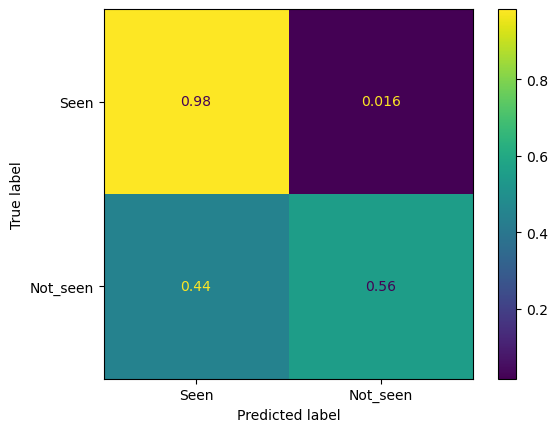

In [34]:
# plot your confusion matrix
cm = confusion_matrix(y_test, y_pred ,normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype)
disp.plot()
plt.show()

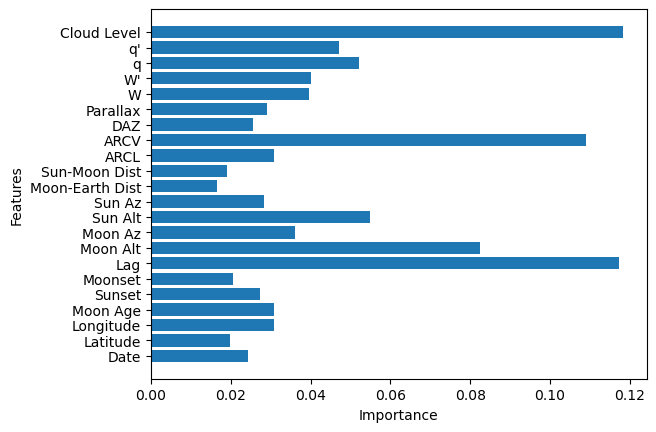

In [35]:
# Plot importance
importance = rf.feature_importances_
ytix = features

plt.barh(range(len(features)), importance)
plt.yticks(range(len(features)), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Hyperparameter adjustment - not of much note yet

In [36]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

#%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [37]:
grid_search.best_score_

0.925

In [38]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [39]:
# Produce predictions for the classification of your training dataset using your model:
y_pred_best = rf_best.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred_best))
rf_best_acc_train = metrics.accuracy_score(y_train, y_pred_best)
y_pred_best = rf_best.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred_best))
rf_best_acc_train = metrics.accuracy_score(y_test, y_pred_best)

Accuracy on training dataset: 0.9769230769230769
Accuracy on testing dataset: 0.9312977099236641
